# Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Implementacion de Runge Kutta de orden 4

In [9]:
#h: paso
#n: numero de iteraciones
#t0: t inicial
#y0: valor inicial
#f: la funcion diferencial que depende de t e y
def runge_kutta_orden_4(f, y0, t0, n, h):
    valores_de_y = [y0]
    valores_de_t = [t0]

    for i in range(n):
        y_actual = valores_de_y[-1]
        t_actual = valores_de_t[-1]

        k1 = f(t_actual, y_actual)
        k2 = f(t_actual + h/2, y_actual + h*k1/2)
        k3 = f(t_actual + h/2, y_actual + h*k2/2)
        k4 = f(t_actual + h, y_actual + h*k3)

        y_next = y_actual + h * (k1 + 2*k2 + 2*k3 + k4) / 6
        t_next = t_actual + h

        valores_de_y.append(y_next)
        valores_de_t.append(t_next)

    return np.array(valores_de_t), np.array(valores_de_y)

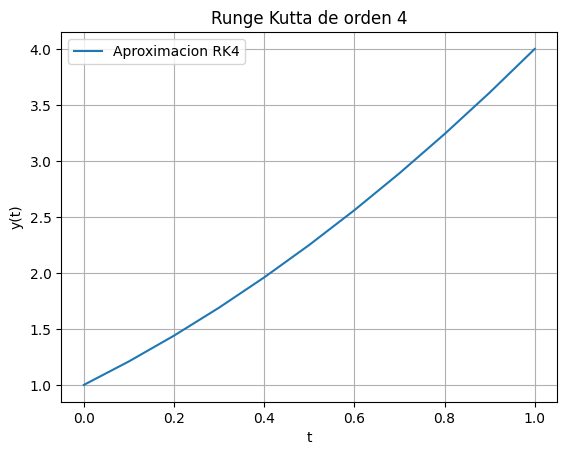

In [13]:
#Ejemplo
def f(t, y):
    return y - t**2 + 1

t0 = 0
y0 = 1
h = 0.1
n = 10

t, y = runge_kutta_orden_4(f, y0, t0, n, h)

plt.xlabel("t")
plt.ylabel("y(t)")
plt.plot(t, y, label='Aproximacion RK4')
plt.title("Runge Kutta de orden 4")
plt.legend()
plt.grid()
plt.show()

# 2. Diseño de trayectorias

In [14]:
g = 9.81  # aceleración gravitatoria en m/s^2
m = 800  # masa del auto + piloto en kg
v_max = 305 * 1000 / 3600